<a href="https://colab.research.google.com/github/Dharshini015/CognoRiseInfoTech/blob/main/Titanic_survival_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data= pd.read_csv("/content/tested.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
np.round(data['Age'].mean())

30.0

In [ ]:
data['Age'].fillna(np.round(data['Age'].mean()),inplace=True)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [ ]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data['Fare'].fillna(data['Fare'].median(),inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df=data.drop(['PassengerId','Name','Ticket','Fare','Cabin',],axis=1)

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S
5,0,3,male,14.0,0,0,S
6,1,3,female,30.0,0,0,Q
7,0,2,male,26.0,1,1,S
8,1,3,female,18.0,0,0,C
9,0,3,male,21.0,2,0,S


<ipython-input-75-8e93045d8989>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

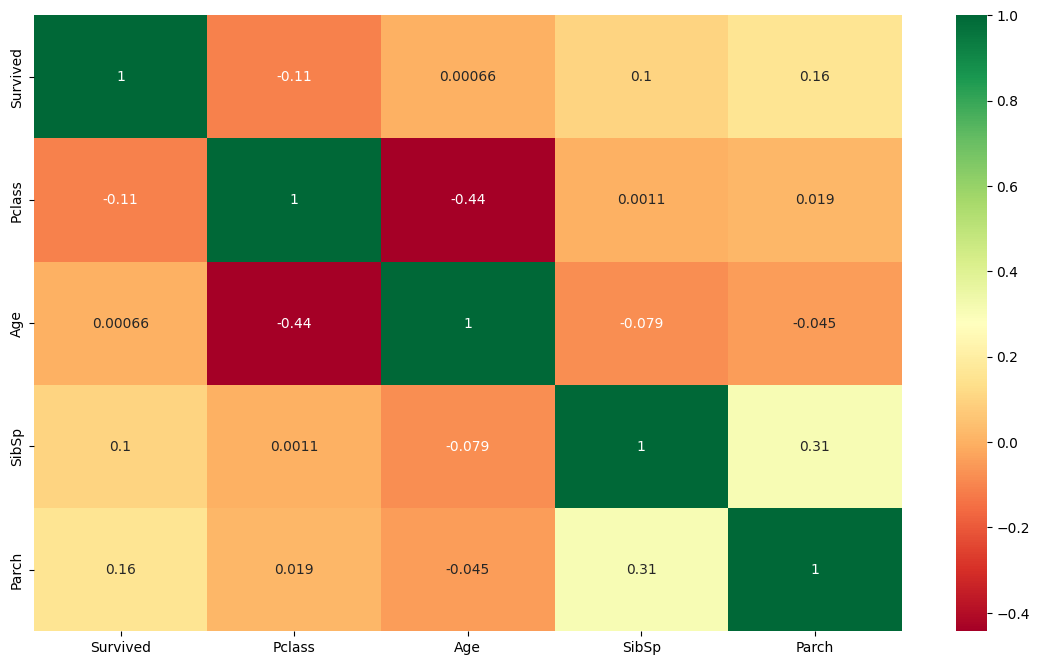

In [ ]:
plt.figure(figsize=(14,8))
sn.heatmap(df.corr(),annot=True,cmap='RdYlGn')

<Axes: xlabel='Pclass', ylabel='count'>

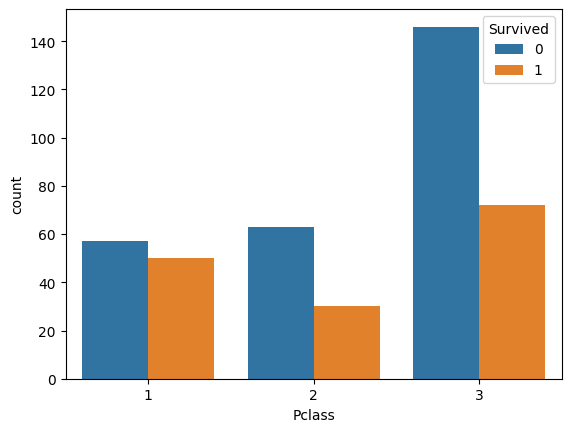

In [ ]:
sn.countplot(x='Pclass',hue='Survived',data=df)

In [ ]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
data_df['Embarked'] = label_encoder.fit_transform(data_df['Embarked'])

# Display the updated DataFrame
print(data_df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0         0       3    0  34.5      0      0         1
1         1       3    1  47.0      1      0         2
2         0       2    0  62.0      0      0         1
3         0       3    0  27.0      0      0         2
4         1       3    1  22.0      1      1         2


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [ ]:
x=data_df.drop(['Survived'],axis=1)
y=data_df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(C=0.1,solver='liblinear')

In [ ]:
lg.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
train_prediction=lg.predict(x_train)
print(train_prediction)

[0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1
 0]


In [ ]:
lg.score(x_train,y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score
prediction=lg.predict(x_test)
acc=accuracy_score(y_test,prediction)
print(acc)

1.0
